### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [237]:
data = pd.read_csv('data/coupons.csv')

In [238]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [239]:
missing_values=data.isnull().sum()
print(missing_values)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

The "car" column contains 99.14% missing values; therefore, it was determined that this data was irrelevant for coupon analysis and was subsequently removed.

74 duplicate records were identified, and this survey quite possible for duplicates so not removing the duplicates

In [240]:
import sweetviz as sv
#Generate Exploratory Data Analysis using the sweetviz library
report = sv.analyze(data)
report.show_html("edareport.html")

                                             |  | [  0%]   00:00 -> (? left)

Report edareport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


The Sweetviz library was employed to conduct a thorough analysis of missing data. The library provides the data for each column with visuals and bars, which helps easily understand the missing data. 

In [241]:
print(data.shape)
# Dropping the column and data using axis
data=data.drop("car", axis=1)
print(data.shape)


(12684, 26)
(12684, 25)


In [242]:
# Find the duplicate rows and print them
data_duplicates=data.duplicated().sum();
print('Duplicate records in the coupon data',data_duplicates)
#print('Before Deletion Data Shape',data.shape)
# Delete the duplicates keeping the last duplicate value
#data=data.drop_duplicates(keep='last')
#print('After Deletion Data Shape',data.shape)

Duplicate records in the coupon data 74


4. What proportion of the total observations chose to accept the coupon?



In [243]:
#Evaluate the coupon acceptance observation from column Y in the dataset. 1 being coupon accepted and 0 not being accepted
total_coupon_count=data.shape[0]
print('Total Coupon Count :',total_coupon_count)
coupon_accept_count=data["Y"].value_counts()[1]
print( 'Coupon accepted count :',coupon_accept_count)
portion_accepted=coupon_accept_count/total_coupon_count
print('The proportion of the total observations chose to accept the coupon is :',portion_accepted)


Total Coupon Count : 12684
Coupon accepted count : 7210
The proportion of the total observations chose to accept the coupon is : 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

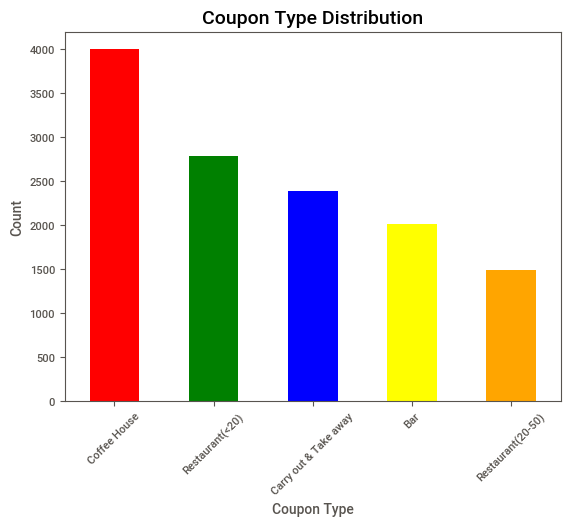

In [244]:

color_mapping = {
    'Coffee House': 'red',
    'Restaurant(<20)': 'green',
    'Carry out & Take away': 'blue',
    'Bar': 'yellow',
    'Restaurant(20-50)': 'orange'
}
value_counts=data['coupon'].value_counts()
data['coupon'].value_counts().plot(kind='bar', color=[color_mapping[coupon] for coupon in value_counts.index])
plt.title('Coupon Type Distribution', size=14)
plt.xlabel('Coupon Type',size=10)
plt.ylabel('Count',size=10)
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

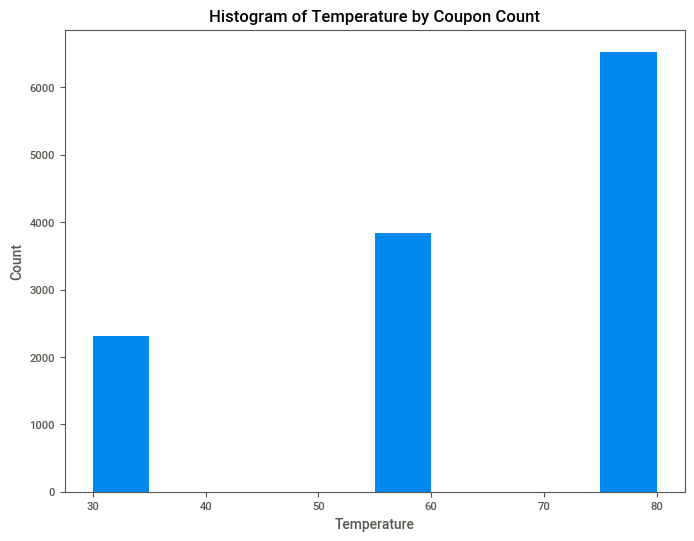

In [245]:
# Create histogram by temperature with size 8,6
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=10, alpha=1,)
# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Temperature by Coupon Count')
# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [246]:
data_bar_coupon=data.query("coupon=='Bar'")
#data_bar_coupon.head(5)

2. What proportion of bar coupons were accepted?


In [247]:
#Total Bar Coupons 
total_bar_coupon=data_bar_coupon.shape[0]
print('Total Bar Coupons : ', total_bar_coupon)
#Accepted Bar Coupons 
bar_accepted_coupon=data_bar_coupon['Y'].value_counts()[1]
print('Bar Accepted Coupons : ', bar_accepted_coupon)
#proportion formula accepted/total bar coupon 
bar_accepted_portion= bar_accepted_coupon/total_bar_coupon
print('The proportion of bar coupons were accepted is :', bar_accepted_portion)


Total Bar Coupons :  2017
Bar Accepted Coupons :  827
The proportion of bar coupons were accepted is : 0.41001487357461575


The Bar Coupon was accepted around 41% of the times


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [248]:
# To see what the unique values exist in the bar columns 
bar_unique=data_bar_coupon['Bar'].unique()
print(bar_unique)
# To get who went to the bar 3 or less than 3 times 
data_fewer_than_3= data_bar_coupon[data_bar_coupon['Bar'].isin(['less1','1~3'])]
# To get who went to the bar more than 3 times 
data_more_than_3= data_bar_coupon[data_bar_coupon['Bar'].isin(['4~8','gt8'])]
#Acceptance rate verified by using the mean method 
acceptance_rate_3_or_less=data_fewer_than_3['Y'].mean()
acceptance_rate_morethan_3 =data_more_than_3['Y'].mean()

print('The acceptance rate 3 or less time in month is :',acceptance_rate_3_or_less )
print('The acceptance rate more than 3 in month is :',acceptance_rate_morethan_3 )





['never' 'less1' '1~3' 'gt8' nan '4~8']
The acceptance rate 3 or less time in month is : 0.5274043433298863
The acceptance rate more than 3 in month is : 0.7688442211055276


The bar coupon acceptance for those who go to the bar 3 or fewer times in a month is approximately 53%.
The bar coupon acceptance for those who go to the bar more than 3 times in a month is 77% approximately.




4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [249]:
# To find unique ages from the data 
data['age'].unique()
# replace age character with numeric values
data['age_numeric']=data['age'].replace({'50plus':50,'below21':20}).astype(int)
data_bar_coupon=data.query("coupon=='Bar'")
#Filter drivers who go to a bar more than once a month and are over the age of 25 
data_more_than_25=data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3','gt8','4~8'])) & (data_bar_coupon['age_numeric']>25)]
#Finding other drivers with not equals of above data set 
data_others=data_bar_coupon[~(data_bar_coupon['Bar'].isin(['1~3','gt8','4~8'])) & (data_bar_coupon['age_numeric']>25)]
#Calculate acceptance rate criteria for  groups 
data_more_than_25_acceptance =data_more_than_25['Y'].mean()
data_others_acceptance=data_others['Y'].mean()
print('The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 :',data_more_than_25_acceptance)
print('The acceptance rate for other drivers  :',data_others_acceptance)

The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 : 0.6952380952380952
The acceptance rate for other drivers  : 0.26349496797804206


The bar coupon acceptance rate for drivers who go to the bar more than once a month and are over the age of 25 is 69% approximately.
The bar coupon acceptance rate for other drivers 26% approximately. 



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [250]:
#filter who go to bars more than once a month and had passengers that were not a kid 
data_bar_coupon=data.query("coupon=='Bar'")
data_more_than_once_not_kids=data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3','gt8','4~8'])) & (data_bar_coupon['passanger']!='Kid(s)') & (~data_bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]
# Acceptance rate calculation using the mean
acceptance_rate_not_kids=data_more_than_once_not_kids['Y'].mean()
print('Acceptance rate who go to bars more than once a month and had passengers that were not a kid :',acceptance_rate_not_kids)
# Acceptance rate for others
data_others = data_bar_coupon[~data_bar_coupon.index.isin(data_more_than_once_not_kids.index)]
acceptance_others = data_others['Y'].mean()
print('Acceptance rate for others :', acceptance_others)


Acceptance rate who go to bars more than once a month and had passengers that were not a kid : 0.7132486388384754
Acceptance rate for others : 0.296043656207367


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [251]:
# Filter1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
Question1 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['passanger'] != 'Kid(s)') & (data_bar_coupon['maritalStatus'] != 'Widowed')
# Filter 2: Go to bars more than once a month and are under the age of 30
# conversion of age strings to numeric values converted to 'age_numeric' column on data dataframe
Question2 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_numeric'] < 30)
# Filter 3: Go to cheap restaurants more than 4 times a month and income is less than 50K 
Question3 = (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

#Apply conditions to filter dataset 
filter_Q1=data_bar_coupon[Question1]
filter_Q2=data_bar_coupon[Question2]
filter_Q3=data[Question3]

#calculate acceptance rates 
filter_Q1_acceptance_rate=filter_Q1['Y'].mean()
filter_Q2_acceptance_rate=filter_Q2['Y'].mean()
filter_Q3_acceptance_rate=filter_Q3['Y'].mean()

print ('The acceptance rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed :',filter_Q1_acceptance_rate)
print('The acceptance rate for go to bars more than once a month and are under the age of 30 :', filter_Q2_acceptance_rate)
print ('The acceptance rate go to cheap restaurants more than 4 times a month and income is less than 50K', filter_Q3_acceptance_rate)


The acceptance rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed : 0.7132486388384754
The acceptance rate for go to bars more than once a month and are under the age of 30 : 0.7217391304347827
The acceptance rate go to cheap restaurants more than 4 times a month and income is less than 50K 0.6007020623080298


The bar coupon acceptance rate was approximately 71% for drivers who visit bars more than once a month, have passengers other than children, and are not widowed.

The acceptance rate for drivers under 30 who visit bars more than once a month was around 72%.

The acceptance rate dropped to 60% for drivers who dine at inexpensive restaurants more than four times a month and have an income below $50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis on Bar Coupon Acceptance
Based on the observations, we can hypothesize the following factors influencing bar coupon acceptance among drivers:

1. Frequency of Bar Visits
Drivers who visit bars frequently, particularly more than three times a month, are significantly more likely to accept bar coupons. This suggests a strong correlation between bar-going habits and coupon acceptance, likely because regular patrons place a higher value on such discounts.

2. Age 
Younger drivers, especially those under 30, exhibit a higher acceptance rate for bar coupons. This trend may indicate that younger demographics are more inclined toward social outings, such as bar visits, and are more receptive to promotional offers related to these activities.

3. Marital Status and Occupation
Drivers who are not widowed and work outside farming, fishing, or forestry professions are more likely to accept bar coupons. This may reflect lifestyle differences, where individuals in certain occupations or marital statuses engage in social activities more frequently or perceive leisure-related discounts as more valuable.

4. Economic and Dining Preferences
Economic status and dining habits appear to influence coupon acceptance. For instance, drivers who frequent inexpensive restaurants more than four times a month and earn less than $50K have distinct acceptance rates. This suggests that financial considerations and dining preferences may shape their perception of bar coupons' value.

5. General Trends Among Other Drivers
The lower acceptance rate among "all other drivers" indicates that specific demographic and behavioral traits significantly impact coupon acceptance. This group likely consists of individuals who do not frequent bars or do not align with the characteristics associated with higher acceptance rates.

Conclusion
These hypotheses suggest that a combination of demographic factors (age, marital status), behavioral patterns (bar visit frequency), economic conditions, and personal preferences (dining habits) play a crucial role in determining the likelihood of accepting bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [252]:
data_coffee_coupon=data.query("coupon=='Coffee House'")

In [253]:
#Total Coffee House Coupons 
total_coffee_coupon=data_coffee_coupon.shape[0]
print('Total Coffee Coupons : ', total_coffee_coupon)
#Accepted Coffee Coupons 
coffee_accepted_coupon=data_coffee_coupon['Y'].value_counts()[1]
print('Coffee Coupon Accepted  : ', coffee_accepted_coupon)
#proportion formula accepted/total bar coupon 
coffee_accepted_portion= coffee_accepted_coupon/total_coffee_coupon
print('The proportion of coffee coupons were accepted is :', coffee_accepted_portion)


Total Coffee Coupons :  3996
Coffee Coupon Accepted  :  1995
The proportion of coffee coupons were accepted is : 0.49924924924924924


The Coffee Coupon was accepted around 50% of the times

In [254]:
# To see what the unique values exist in the coffee columns 
Coffee_unique=data_coffee_coupon['CoffeeHouse'].unique()
print(Coffee_unique)
# To get who went to the bar 3 or less than 3 times 
data_less_than_3= data_coffee_coupon[data_coffee_coupon['CoffeeHouse'].isin(['less1','1~3'])]
# To get who went to the bar more than 3 times 
data_greater_than_3= data_coffee_coupon[data_coffee_coupon['CoffeeHouse'].isin(['4~8','gt8'])]
#Acceptance rate verified by using the mean method 
coffee_acceptance_rate_3_or_less=data_less_than_3['Y'].mean()
coffee_acceptance_rate_morethan_3 =data_greater_than_3['Y'].mean()

print('The acceptance rate 3 or less time in month is :',coffee_acceptance_rate_3_or_less )
print('The acceptance rate more than 3 in month is :',coffee_acceptance_rate_morethan_3 )



['never' 'less1' '4~8' '1~3' 'gt8' nan]
The acceptance rate 3 or less time in month is : 0.5635333018422296
The acceptance rate more than 3 in month is : 0.675


The Coffee House Coupon acceptance rate 3 or less time in a month is around 56%
The Coffee House Coupon acceptance rate more than 3 in a month is 67%

In [255]:
data_declined_coffee = data[(data['coupon']=='Coffee House') & (data['Y']==0)]
#print('Coffee House Coupons Declined :', data_declined_coffee)

Distribution by Age:
 age_numeric
21    20.989505
26    20.439780
31    16.291854
50    15.792104
36    10.694653
41     8.095952
46     5.347326
20     2.348826
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Coffee House Coupon Declines by Age')

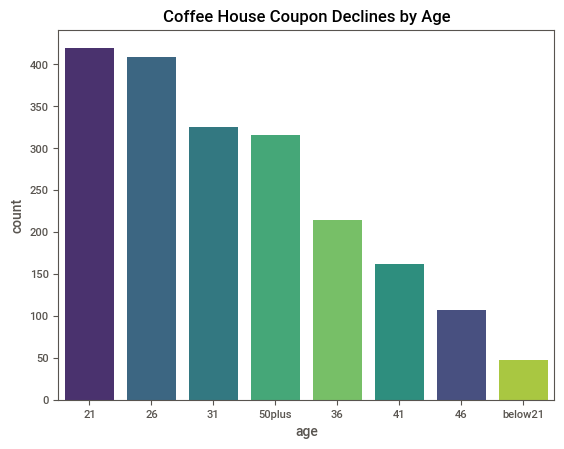

In [256]:
# Coupons decline by age
distr_by_age = data_declined_coffee['age_numeric'].value_counts(normalize=True) * 100

print('Distribution by Age:\n', distr_by_age)
# plot declines by Age
sns.countplot(x='age', data=data_declined_coffee, hue='age', palette='viridis', order = data_declined_coffee['age'].value_counts().index)
plt.title('Coffee House Coupon Declines by Age')

Coffee Coupon Declined age highest for ages 21 & 26 and least decline for age below 21

Distribution by Martial Status:
 maritalStatus
Married partner      39.030485
Single               37.481259
Unmarried partner    18.690655
Divorced              3.598201
Widowed               1.199400
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Coffee House Coupon Declines by MaritalStatus')

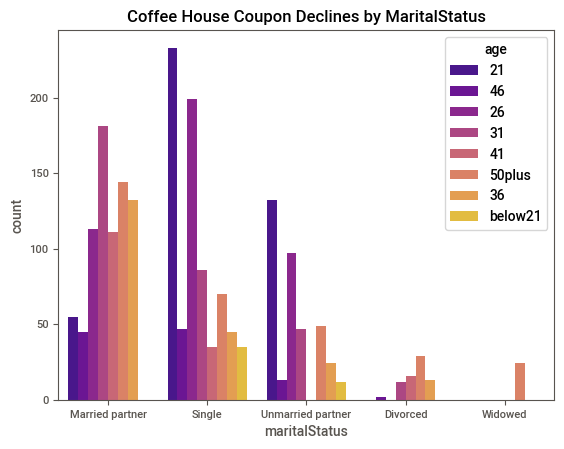

In [257]:
# Coupons decline by age and marital Status
distr_by_maritialStatus = data_declined_coffee['maritalStatus'].value_counts(normalize=True) * 100

print('Distribution by Martial Status:\n', distr_by_maritialStatus)
# plot declines by Age
sns.countplot(x='maritalStatus', data=data_declined_coffee, hue='age',palette='plasma', order = data_declined_coffee['maritalStatus'].value_counts().index)
plt.title('Coffee House Coupon Declines by MaritalStatus')

The highest coupon decline rate is single and age is 21 and lowest decline is divorced and age 21.

Distribution by Education:
 education
Bachelors degree                          36.781609
Some college - no degree                  33.183408
Graduate degree (Masters or Doctorate)    14.642679
Associates degree                          8.445777
High School Graduate                       6.396802
Some High School                           0.549725
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Coffee House Coupon Declines by Education')

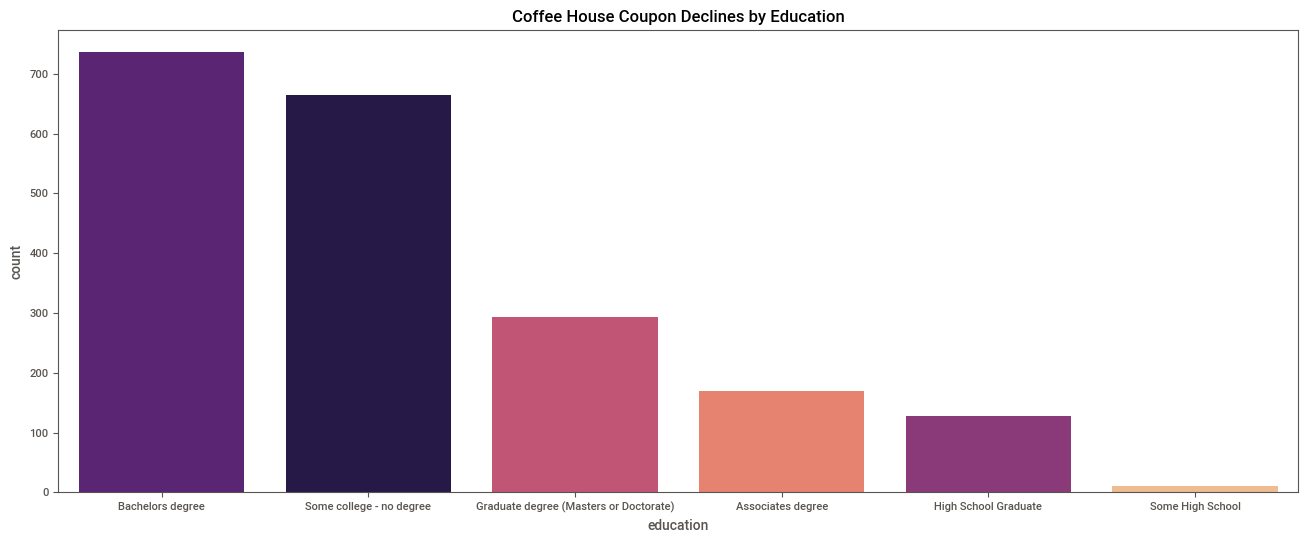

In [258]:
# Coupons decline by Education
distr_by_education = data_declined_coffee['education'].value_counts(normalize=True) * 100
plt.figure(figsize=(16, 6))
print('Distribution by Education:\n', distr_by_education)
# plot declines by Age

sns.countplot(x='education', data=data_declined_coffee,hue='education', palette='magma', order = data_declined_coffee['education'].value_counts().index)
plt.title('Coffee House Coupon Declines by Education')

The Coffee House Coupon highest decline for Bachelors degree and next decline is some colleges
The lowest decline or hight accept rate of the coffee coupon is high school graduates

Observations

Age: The age groups of 21 and 26 years old are the most likely to decline Coffee House Coupons, The most declines for the ages 21 through 31st, delcines 47%. This suggests that younger adults in their early to mid-twenties are more inclined to decline these coupons.

Marital Status: The majority of declines come from individuals with a married partner (approximately 39%) and singles (approximately 37%). This indicates that marital status, particularly being married or single, plays a significant role in the likelihood of declining Coffee House coupons.

Education: Individuals with a Bachelor's degree are the most likely to decline these coupons, making up approximately 37% of the declines, followed by those with some college but no degree (approximately 33%). This suggests a higher tendency to decline among those with higher education levels.